# Batch Project- Cory

## Exploratory Data Analysis and Feature Engineering on:
#### Electrical ( Electrical System )
#### Heating  ( Type of heating )
#### HeatingQC ( Heating quality and condition )
#### CentralAir ( Central air conditioning )
#### KitchenQual ( Kitchen Quality )
### With Respect to HOUSE SALE PRICE
### Based on over 1400 individual house sales

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import Training Set

In [2]:
data_full = pd.read_csv('train.csv')

### Head of full dataset

In [41]:
data_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Isolate my specific features

In [4]:
myColumns = data_full[['Heating','HeatingQC','Electrical','CentralAir','KitchenQual']]

### Head

In [5]:
myColumns.head()

,Heating,HeatingQC,Electrical,CentralAir,KitchenQual
0,GasA,Ex,SBrkr,Y,Gd
1,GasA,Ex,SBrkr,Y,TA
2,GasA,Ex,SBrkr,Y,Gd
3,GasA,Gd,SBrkr,Y,Gd
4,GasA,Ex,SBrkr,Y,Gd


### Analyzing Heating, only 32! records are not GasA

In [39]:
myColumns[myColumns['Heating'] == 'GasW']

,Heating,HeatingQC,Electrical,CentralAir,KitchenQual
69,GasW,TA,SBrkr,Y,TA
93,GasW,Ex,SBrkr,N,TA
108,GasW,TA,FuseF,N,Fa
275,GasW,Gd,SBrkr,N,Ex
313,GasW,TA,SBrkr,Y,TA
417,GasW,TA,FuseA,N,TA
676,GasW,Fa,SBrkr,N,TA
713,GasW,TA,SBrkr,N,TA
735,GasW,Fa,SBrkr,N,TA
747,GasW,TA,SBrkr,N,Gd


In [40]:
myColumns[myColumns['Heating'] == 'Grav']

,Heating,HeatingQC,Electrical,CentralAir,KitchenQual
155,Grav,Fa,FuseF,N,TA
514,Grav,Fa,SBrkr,N,TA
636,Grav,Fa,FuseA,N,Fa
968,Grav,Fa,SBrkr,N,TA
1144,Grav,Fa,FuseA,N,Fa
1337,Grav,Fa,FuseA,N,Fa
1443,Grav,Fa,FuseF,N,Fa


In [36]:
myColumns[myColumns['Heating'] == 'Wall']

,Heating,HeatingQC,Electrical,CentralAir,KitchenQual
342,Wall,Fa,FuseA,N,TA
749,Wall,TA,FuseF,N,TA
1090,Wall,Fa,FuseA,N,TA
1412,Wall,Fa,FuseF,N,TA


In [37]:
myColumns[myColumns['Heating'] == 'OthW']

,Heating,HeatingQC,Electrical,CentralAir,KitchenQual
1248,OthW,Fa,SBrkr,N,TA
1349,OthW,Fa,SBrkr,N,TA


In [38]:
myColumns[myColumns['Heating'] == 'Floor']

,Heating,HeatingQC,Electrical,CentralAir,KitchenQual
1321,Floor,TA,SBrkr,N,TA


### General Information

In [8]:
myColumns.describe()

,Heating,HeatingQC,Electrical,CentralAir,KitchenQual
count,1460,1460,1459,1460,1460
unique,6,5,5,2,4
top,GasA,Ex,SBrkr,Y,TA
freq,1428,741,1334,1365,735


In [9]:
myColumns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
Heating        1460 non-null object
HeatingQC      1460 non-null object
Electrical     1459 non-null object
CentralAir     1460 non-null object
KitchenQual    1460 non-null object
dtypes: object(5)
memory usage: 57.2+ KB


### Note: only 2-5 unique values for each. All delegated columns are categorical

### Checking for missing data within the records

In [10]:
missing = myColumns.isnull().sum()
missing

Heating        0
HeatingQC      0
Electrical     1
CentralAir     0
KitchenQual    0
dtype: int64

### Note: Almost no missing values; just 1 in Electrical.  Will handle missing value later

In [11]:
myColumns[myColumns['Electrical'].isnull()]

,Heating,HeatingQC,Electrical,CentralAir,KitchenQual
1379,GasA,Gd,NaN,Y,Gd


### Next visualizing percentage make up for each feature, then analysing correlation between feature and target variable 'SalePrice'

### Column: Electrical

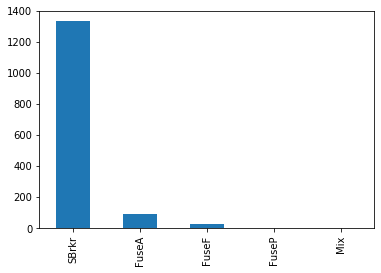

In [12]:
myColumns['Electrical'].value_counts().plot(kind='bar')

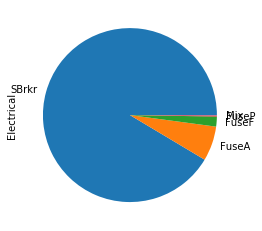

In [13]:
myColumns['Electrical'].value_counts().plot(kind='pie')

#### Notes: Almost all home electrical systems are SBrkr. 
#### Will use mode imputation to handle missing value. 

In [14]:
mode = 'SBrkr'

In [15]:
data_full.Electrical = data_full.Electrical.fillna(mode)

### Analysing effects on saleprice

Text(0.5, 1.0, 'SalePrice vs Electrical')

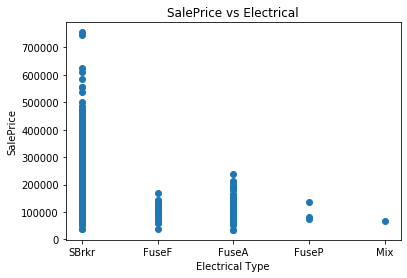

In [19]:
plt.scatter(data_full['Electrical'], data_full['SalePrice'])
plt.xlabel('Electrical Type')
plt.ylabel('SalePrice')
plt.title('SalePrice vs Electrical')

#### Notes: Without SBrkr electrical system, sale price is always at or below $250,000

### Column: Heating

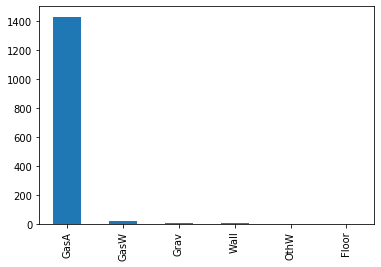

In [20]:
myColumns['Heating'].value_counts().plot(kind='bar')

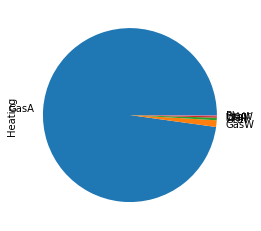

In [21]:
myColumns['Heating'].value_counts().plot(kind='pie')

### Note: Heating almost is all GasA; Very low variance. Candidate column/feature to be dropped

### Analysing effects on saleprice

Text(0.5, 1.0, 'SalePrice vs Heating')

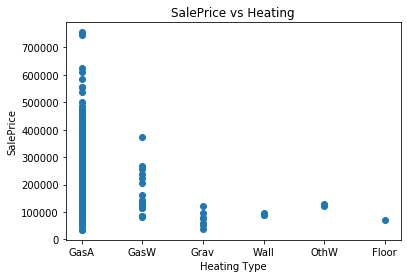

In [22]:
plt.scatter(data_full['Heating'], data_full['SalePrice'])
plt.xlabel('Heating Type')
plt.ylabel('SalePrice')
plt.title('SalePrice vs Heating')

#### Note: Not many instances of non- GasA heating.
#### For the instances we do have: GasA = Saleprice 20k-700k+; GasW = Saleprice 80k-380k; Others = Saleprice < 150k
#### Without GasA house sale price is severely limited to sub-300k

### Column: HeatingQC

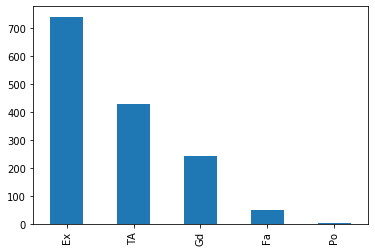

In [23]:
myColumns['HeatingQC'].value_counts().plot(kind='bar')

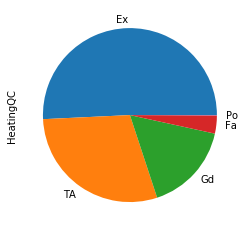

In [24]:
myColumns['HeatingQC'].value_counts().plot(kind='pie')

#### Very few fair and poor heating. Note that these qualities are mostly in relation to 'GasA' type heating

### Analysing effects on saleprice

Text(0.5, 1.0, 'SalePrice vs HeatingQC')

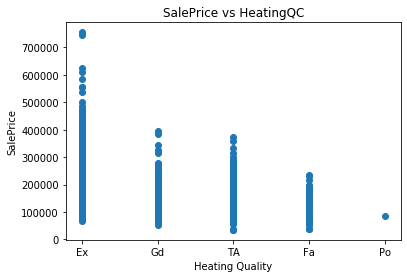

In [25]:
plt.scatter(data_full['HeatingQC'], data_full['SalePrice'])
plt.xlabel('Heating Quality')
plt.ylabel('SalePrice')
plt.title('SalePrice vs HeatingQC')

#### Note: Ex = Saleprice 20k-700k+; Gd, TA = Saleprice 20k-400k; FA is similar to Gd, TA but not > 250k. Po < 100k

#### Without Excellent quality heating saleprice virtually capped at $400k. Can still be low priced even if Ex quality heating

### Column: KitchenQual

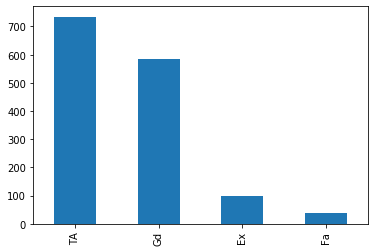

In [26]:
myColumns['KitchenQual'].value_counts().plot(kind='bar')

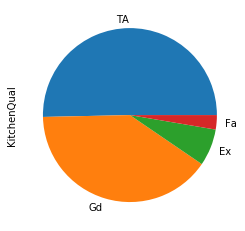

In [27]:
myColumns['KitchenQual'].value_counts().plot(kind='pie')

#### Over 80% TA or Gd. Few Ex and Fa

### Analysing effect on saleprice

Text(0.5, 1.0, 'SalePrice vs KitchenQC')

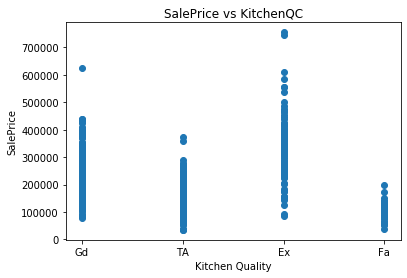

In [28]:
plt.scatter(data_full['KitchenQual'], data_full['SalePrice'])
plt.xlabel('Kitchen Quality')
plt.ylabel('SalePrice')
plt.title('SalePrice vs KitchenQC')

#### Ex has highest potential saleprice but can still be low priced even if Ex.Same for Gd, Ta
#### The Kitchen being only Fa or not Ex effectively limits potential saleprice  

### Column: CentralAir

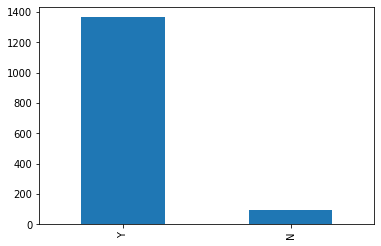

In [29]:
myColumns['CentralAir'].value_counts().plot(kind='bar')

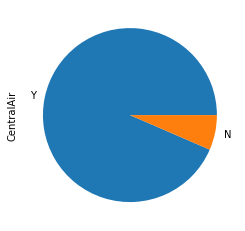

In [30]:
myColumns['CentralAir'].value_counts().plot(kind='pie')

#### Central air over 80% yes

### Analysing effect on saleprice

Text(0.5, 1.0, 'SalePrice vs CentralAir')

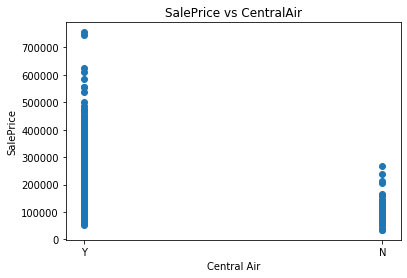

In [31]:
plt.scatter(data_full['CentralAir'], data_full['SalePrice'])
plt.xlabel('Central Air')
plt.ylabel('SalePrice')
plt.title('SalePrice vs CentralAir')

#### Without central air, potential sale price is severely limited to < 250k in most instances

In [9]:
data_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Analysis Complete Mock Feature Engineering Continues Below

In [4]:
refined2 = data_full

In [5]:
refined2.Heating

0       GasA
1       GasA
2       GasA
3       GasA
4       GasA
        ... 
1455    GasA
1456    GasA
1457    GasA
1458    GasA
1459    GasA
Name: Heating, Length: 1460, dtype: object

In [6]:
refined2 = refined2.drop(['Heating'], axis=1)

In [8]:
refined2.HeatingQC

0       Ex
1       Ex
2       Ex
3       Gd
4       Ex
        ..
1455    Ex
1456    TA
1457    Ex
1458    Gd
1459    Gd
Name: HeatingQC, Length: 1460, dtype: object

In [35]:
refined = pd.get_dummies(data_full, columns=['Electrical'], drop_first=True)


In [36]:
refined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,0,0,0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,0,0,0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,0,0,0,1


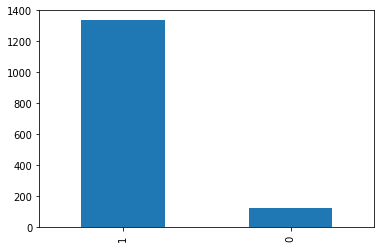

In [37]:
refined['Electrical_SBrkr'].value_counts().plot(kind='bar')